In [1]:
#Import packages

#Rdkit
from rdkit import Chem
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Pandas
import pandas as pd
from pandas import DataFrame

#Others
import random
import numpy as np
import os
import math
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [3]:
#AlvaDesc (If 'AlvaDesc' is not installed, load the corresponding csv file)
#from alvadesccliwrapper.alvadesc import AlvaDesc
#AlvaDesc Path(Linux default alvaDescCLI location)
#aDesc = AlvaDesc('E:/C++/alvaDesc/alvaDescCLI.exe') 
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("/data")

# 1. Kmeans

In [4]:
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/Raw_data.csv',index_col=0)
X_LR_feature=pd.read_csv("./Results/data_lr.csv",sep=',',index_col=[0],header=[0])
X_LR_feature.columns

Index(['MATS3p', 'SM10_AEA(dm)', 'GATS7s', 'F07[N-O]', 'VE1sign_Dz(v)',
       'VE3sign_D/Dt', 'P_VSA_charge_4', 'CATS2D_09_DA', 'B09[O-O]',
       'CATS2D_06_DL', 'SpMAD_EA(ri)', 'P_VSA_charge_7', 'CATS2D_04_AA',
       'CATS2D_05_DL', 'H-052', 'F05[N-N]', 'SpDiam_AEA(ed)', 'VE1sign_B(p)',
       'F10[O-O]', 'nN(CO)2', 'CATS2D_03_DL', 'GATS6i', 'CATS2D_05_DA',
       'C-016'],
      dtype='object')

In [5]:
Raw_all_data=X_NAomit_data[X_LR_feature.columns.tolist()]
print_RxC(Raw_all_data)
Raw_all_data.head()

71 Moleculars × 24 Descriptors


,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,H-052,F05[N-N],SpDiam_AEA(ed),VE1sign_B(p),F10[O-O],nN(CO)2,CATS2D_03_DL,GATS6i,CATS2D_05_DA,C-016
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,-0.085445,11.607041,0.962089,4.0,0.254645,-3.162861,0.00000,2.0,0.0,0.0,...,0.0,0.0,6.452423,0.148190,0.0,0.0,0.0,0.908619,4.0,0.0
Ma_2019_U,-0.087509,11.152723,1.131327,1.0,0.077999,-1.441985,0.00000,1.0,1.0,1.0,...,0.0,0.0,6.337919,0.379142,0.0,1.0,0.0,0.931446,4.0,1.0
Ma_2019_C,-0.100433,11.152723,1.023020,2.0,0.066562,-1.441985,16.78553,1.0,0.0,1.0,...,0.0,0.0,6.337919,0.345265,0.0,0.0,0.0,0.994197,4.0,1.0
Ma_2019_G,-0.047845,11.639705,0.940430,4.0,0.196205,-2.781456,16.78553,3.0,1.0,0.0,...,0.0,1.0,6.451673,0.301552,0.0,0.0,0.0,0.972681,5.0,0.0
Ma_2019_dA,-0.061137,11.234674,1.124941,2.0,0.301976,-3.041917,0.00000,2.0,0.0,1.0,...,0.0,0.0,6.337624,0.171238,0.0,0.0,0.0,0.962266,1.0,0.0


In [6]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Raw_all_data)
X_scaled_data=Transformer.transform(Raw_all_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Raw_all_data.columns
X_scaled_data.index=Raw_all_data.index
print_RxC(X_scaled_data)

71 Moleculars × 24 Descriptors


In [7]:
pca = PCA(n_components=2,random_state=0)
pca.fit(X_scaled_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.38820655 0.17279802]
[0.82072239 0.36531893]
24
24


In [8]:
newdf = pca.fit_transform(X_scaled_data)
PCA=pd.DataFrame(newdf)
PCA.columns=["PCA1","PCA2"]
PCA.index=X_scaled_data.index
PCA['GEL']=Raw_data['Hydrogel-forming ability']
PCA.to_csv("./Results/Figs/Supplementary Fig. 5.csv",sep=',')
PCA.head()

,PCA1,PCA2,GEL
ID,,,
Ma_2019_A,0.082740,-0.767397,Gelator
Ma_2019_U,-0.121564,0.774296,Gelator
Ma_2019_C,0.636932,-0.232433,Gelator
Ma_2019_G,-0.424933,-0.446558,Gelator
Ma_2019_dA,0.190014,-0.587259,Gelator


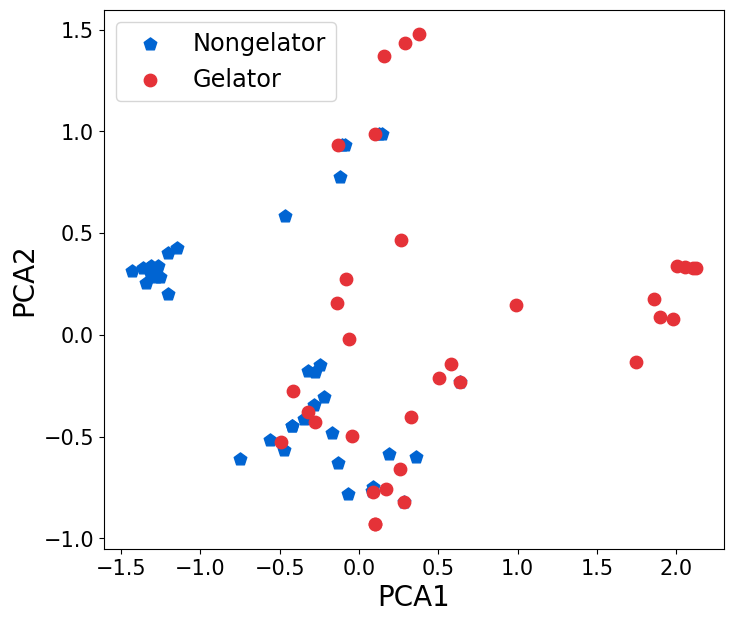

In [9]:
x1 = PCA[PCA['GEL'] == 'Gelator']
x2 = PCA[PCA['GEL'] == 'Nongelator']
plt.rcParams['figure.figsize'] = (8, 7) 
#plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],  alpha=0.8, c = "#f5af02", marker='o', label='Pubchem')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],   s=90, c = "#0064d2", marker='p', label='Nongelator')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], s=80, c = "#e53238", marker='o', label='Gelator')
plt.tick_params(labelsize=15 )
#8db9ca
plt.xlabel('PCA1',fontsize = 20)
plt.ylabel('PCA2',fontsize = 20)
plt.legend(loc=2,fontsize='xx-large')
plt.savefig("./Original figure/Fig. S5.svg", dpi=300,format="svg")
plt.show()

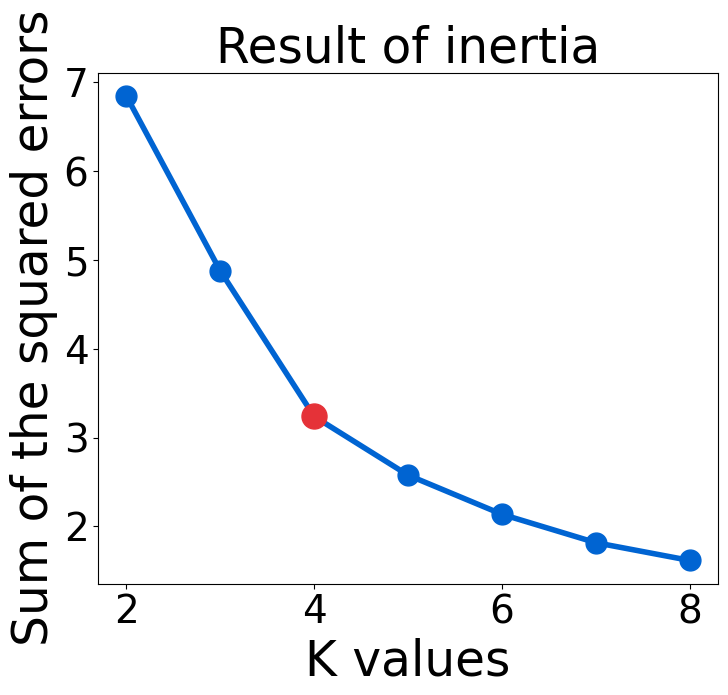

In [10]:
X=np.array(PCA.drop(columns=['GEL']))
plt.rcParams['figure.figsize'] = (8, 7) 
plt.title('Result of inertia',fontsize = 35)#设置标题
inertia=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2,9),inertia,'o-',markersize='15',linewidth =4, color="#0064d2")
plt.plot(4,inertia[2],'o-',markersize='18',linewidth =4.5, color="#e53238")
plt.tick_params(labelsize=28 )
plt.ylabel('Sum of the squared errors',fontsize = 35)
plt.xlabel('K values',fontsize = 35)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("./Original figure/Fig. S6a.svg", dpi=300,format="svg")
plt.show()

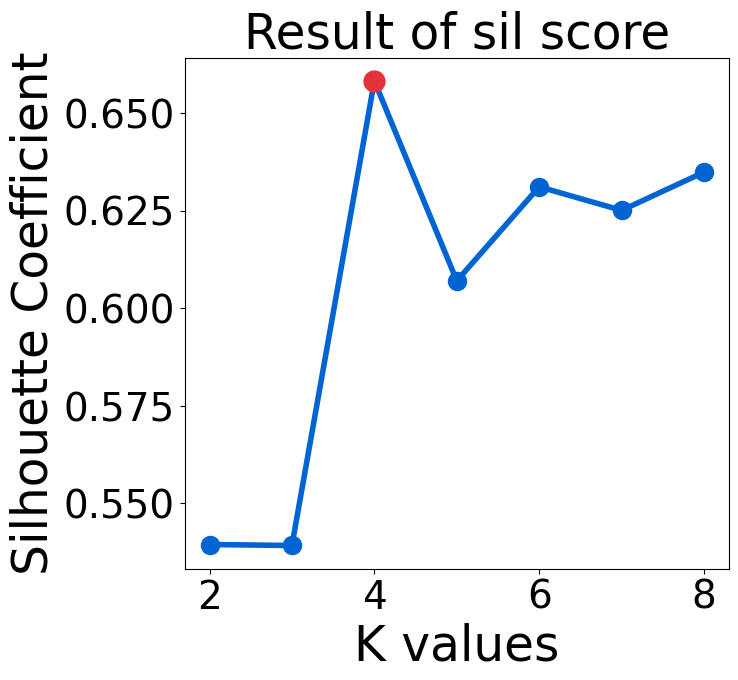

In [11]:
plt.rcParams['figure.figsize'] = (8, 7) 
plt.title('Result of sil score',fontsize = 35)#设置标题
sil_score=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
    sil_score.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,9),sil_score,'o-',markersize='13',linewidth =4, color="#0064d2")
plt.plot(4,sil_score[2],'o-',markersize='15',linewidth =4.5, color="#e53238")
plt.ylabel('Silhouette Coefficient',fontsize = 35)
plt.tick_params(labelsize=28 )
plt.xlabel('K values',fontsize = 35)
plt.gcf().subplots_adjust(left=0.22,bottom=0.15)
plt.savefig("./Original figure/Fig. S6b.svg", dpi=300,format="svg")
plt.show()

In [12]:
y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)
PCA['Kmeans']=y_pred 
PCA.to_csv("./Results/Figs/Supplementary Fig. 6.csv",sep=',')
PCA

,PCA1,PCA2,GEL,Kmeans
ID,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1
Ma_2019_U,-0.121564,0.774296,Gelator,0
Ma_2019_C,0.636932,-0.232433,Gelator,1
Ma_2019_G,-0.424933,-0.446558,Gelator,1
Ma_2019_dA,0.190014,-0.587259,Gelator,1
...,...,...,...,...
Tang_2019_ArabinoC,0.636932,-0.232433,Nongelator,1
Tang_2019_DideoxyC,0.991547,0.145011,Nongelator,2
Peters_2014_3,-0.322354,-0.381028,Nongelator,1


In [13]:
x1 = PCA[PCA['Kmeans'] == 0]
x2 = PCA[PCA['Kmeans'] == 1]
x3 = PCA[PCA['Kmeans'] == 2]
x4 = PCA[PCA['Kmeans'] == 3]

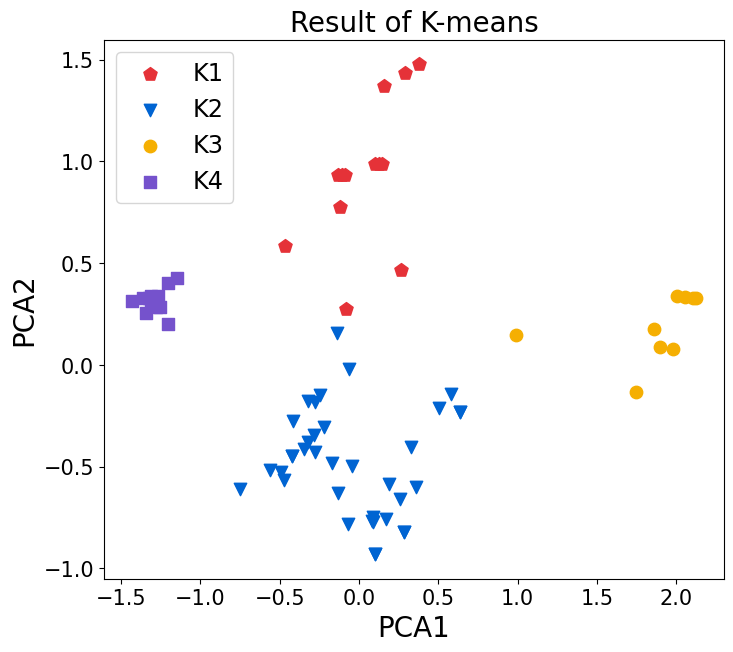

In [14]:
plt.title('Result of K-means',fontsize = 20)#设置标题
plt.rcParams['figure.figsize'] = (8, 7) 
#plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],  alpha=0.8, c = "#f5af02", marker='o', label='Pubchem')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],   s=100, c = "#e53238", marker='p',  label='K1')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], s=80, c = "#0064d2", marker='v',  label='K2')
plt.scatter(x3.iloc[:, 0], x3.iloc[:, 1],   s=80, c = "#f5af02", marker='o',  label='K3')
plt.scatter(x4.iloc[:, 0], x4.iloc[:, 1], s=80, c = "#7552cc", marker='s',  label='K4')
plt.tick_params(labelsize=15 )
#8db9ca
plt.xlabel('PCA1',fontsize = 20)
plt.ylabel('PCA2',fontsize = 20)
plt.legend(loc=2,fontsize='xx-large')

plt.savefig("./Original figure/Fig. S6c.svg", dpi=300,format="svg")
plt.show()

In [15]:
PCA["Kmeans"] = PCA["Kmeans"].astype(str)
PCA["Full Name"] = PCA["GEL"] + " " + PCA["Kmeans"]
PCA['Chemdraw_smiles']=Raw_data['Chemdraw_smiles']
PCA['ID_index'] = range(len(PCA))
PCA['Full Name'] = pd.Categorical(PCA['Full Name'])
PCA['Code'] = PCA['Full Name'].cat.codes
PCA.to_csv("./Results/Train&Test/Train&Test_data.csv",sep=',')
PCA

,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code
ID,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1
...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.636932,-0.232433,Nongelator,1,Nongelator 1,O=C1N=C(C=CN1[C@@H]2O[C@@H]([C@H]([C@@H]2O)O)CO)N,66,4
Tang_2019_DideoxyC,0.991547,0.145011,Nongelator,2,Nongelator 2,O=C1N=C(N)C=CN1[C@@H]2O[C@H](CO)CC2,67,5
Peters_2014_3,-0.322354,-0.381028,Nongelator,1,Nongelator 1,O=C1C2=C(N=CN1)N([C@H]3[C@H](O)[C@H](O)[C@@H](...,68,4


# 2. Train Test split

In [17]:
PCA=pd.read_csv('./Results/Train&Test/Train&Test_data.csv',encoding='utf-8',header=0,index_col=0)
PCA

,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code
ID,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1
...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.636932,-0.232433,Nongelator,1,Nongelator 1,O=C1N=C(C=CN1[C@@H]2O[C@@H]([C@H]([C@@H]2O)O)CO)N,66,4
Tang_2019_DideoxyC,0.991547,0.145011,Nongelator,2,Nongelator 2,O=C1N=C(N)C=CN1[C@@H]2O[C@H](CO)CC2,67,5
Peters_2014_3,-0.322354,-0.381028,Nongelator,1,Nongelator 1,O=C1C2=C(N=CN1)N([C@H]3[C@H](O)[C@H](O)[C@@H](...,68,4


In [18]:
from sklearn.model_selection import train_test_split
X=np.array(PCA['ID_index'])
y=np.array(PCA['Code'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
filtered_train = PCA[PCA['ID_index'].isin(X_train.tolist())]
filtered_train['Group']="Train"
print_RxC(filtered_train)
filtered_train.to_csv("./Results/Train&Test/filtered_train.csv",sep=',')
filtered_train.head()

56 Moleculars × 9 Descriptors


,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group
ID,,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1,Train
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0,Train
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1,Train
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1,Train
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1,Train


In [19]:
filtered_test = PCA[PCA['ID_index'].isin(X_test.tolist())]
filtered_test['Group']="Test"
print_RxC(filtered_test)
filtered_test.to_csv("./Results/Train&Test/filtered_test.csv",sep=',')
filtered_test.head()

15 Moleculars × 9 Descriptors


,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group
ID,,,,,,,,,
Zhao_2016_1,-0.348646,-0.414863,Gelator,1,Gelator 1,NC1=C(C2=NC(N1)=O)N=CN2[C@H]3[C@H](O)[C@@H]([C...,8,1,Test
Zhao_2017_2,-0.280664,-0.181458,Gelator,1,Gelator 1,NC(NC(N=C12)=O)=C2N=NN1[C@H]3C[C@H](O)[C@@H](C...,12,1,Test
Zhao_2017_6,-0.083641,0.273375,Nongelator,0,Nongelator 0,O=C1C2=C(N(C=C2)[C@H]3C[C@H](O)[C@@H](CO)O3)N=...,15,3,Test
Wang_2022_b,0.259131,-0.658257,Nongelator,1,Nongelator 1,NC1=NC(N)=C(N=CN2[C@H]3C[C@@H]([C@H](O3)CO)O)C...,17,4,Test
Park_2003_3,-1.346281,0.256277,Gelator,3,Gelator 3,O=C1NC(C(C2=CN(N=N2)CC3=CC=CC(C)=C3)=CN1[C@H]4...,23,2,Test


In [20]:
Concat_data=pd.concat([filtered_train,filtered_test])
df=Concat_data
df.to_csv("./Results/Figs/Supplementary Fig. 7.csv",sep=',')
df.head()

,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group
ID,,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1,Train
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0,Train
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1,Train
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1,Train
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1,Train


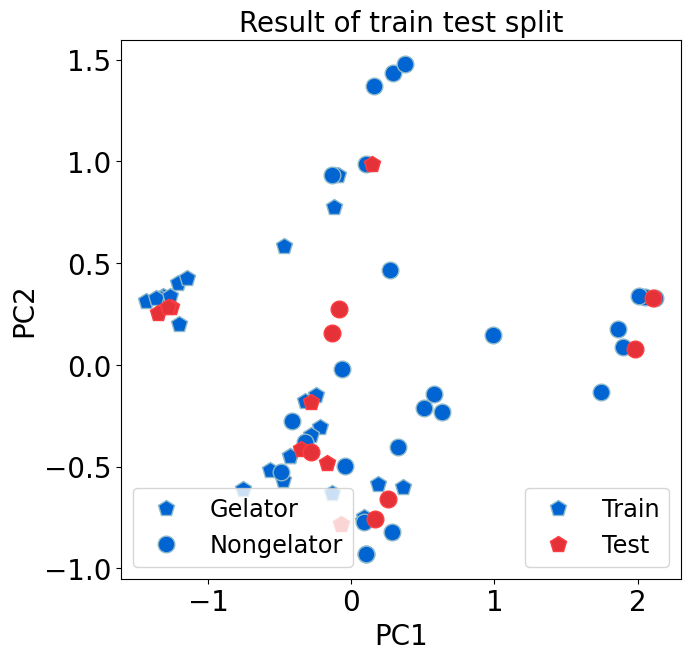

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set(xlim=[0.5, 0.88], ylim=[0.35, 0.78])
plt.xlabel('PC1',fontsize = 20)
plt.ylabel('PC2',fontsize = 20)
plt.title('Result of train test split',fontsize = 20)
plt.tick_params(labelsize=20) 
plt.rcParams['figure.figsize'] = (10, 8) 
df11=filtered_train.loc[filtered_train["GEL"] == "Gelator"]
df12=filtered_train.loc[filtered_train["GEL"] == "Nongelator"]
df21=filtered_test.loc[filtered_test["GEL"] == "Gelator"]
df22=filtered_test.loc[filtered_test["GEL"] == "Nongelator"]
pe11=plt.errorbar(y=df11['PCA2'], x=df11['PCA1'], fmt='p',alpha=1,
             capsize=3, markersize=12, mfc= "#0064d2", mec="#8db9ca", ecolor='#037ef3')
pe12=plt.errorbar(y=df12['PCA2'], x=df12['PCA1'], fmt='o', alpha=1,
             capsize=3, markersize=12, mfc= "#0064d2", mec="#8db9ca", ecolor='#8db9ca')

pe21=plt.errorbar(y=df21['PCA2'], x=df21['PCA1'],fmt='p', alpha=1,
             capsize=3, markersize=12, mfc="#e53238", mec="#ff3c41", ecolor='#037ef3')
pe22=plt.errorbar(y=df22['PCA2'], x=df22['PCA1'],fmt='o', alpha=1,
             capsize=3, markersize=12, mfc="#e53238", mec="#ff3c41", ecolor='#8db9ca')
handles1=[pe11,pe12]
labels1=["Gelator","Nongelator"]
handles2=[pe11,pe21]
labels2=["Train", "Test"]
l1=plt.legend(handles1, labels1,loc="lower left",fontsize='xx-large')
l2=plt.legend(handles2, labels2,loc="lower right",fontsize='xx-large')
plt.gca().add_artist(l1)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig("./Original figure/Fig. S7.svg", dpi=300,format="svg")
plt.show()

# 3. Data arrangement

In [22]:
#Read the data
Raw_data= pd.read_csv('./Results/Train&Test/filtered_train.csv',index_col=0)
Raw_data['Hydrogel-forming ability']=np.where(Raw_data['GEL']=='Gelator', 1, 0)
Chemdraw_smiles=Raw_data['Chemdraw_smiles'].tolist()

In [23]:
Smis=[]
for i in Chemdraw_smiles:
    Smis.append(i)
Mols = []
for Smi in Smis:
    Mol = Chem.MolFromSmiles(Smi)
    Mols.append(Mol)
Canonical_smis = []
for Mol in Mols:
    Canonical_smi = Chem.MolToSmiles(Mol)
    Canonical_smis.append(Canonical_smi)
Raw_data['Canonical_smiles']=Canonical_smis
print_RxC(Raw_data)
Raw_data.to_csv("./Results/Train&Test/train_Raw_data.csv",sep=',',header=1,index=1)
Raw_data.head()

56 Moleculars × 11 Descriptors


,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group,Hydrogel-forming ability,Canonical_smiles
ID,,,,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1,Train,1,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0,Train,1,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1,Train,1,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1,Train,1,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1,Train,1,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1


In [23]:
#Calculate the descriotors
#aDesc.set_input_SMILES(Canonical_smis)
#if not aDesc.calculate_descriptors('ALL'):
# print('Error: ' + aDesc.get_error())
#else:
# Data_gelation=aDesc.get_output()
#X_original_data=pd.DataFrame(Data_gelation)
#Desc_names_names=aDesc.get_output_descriptors()
#X_original_data.columns=Desc_names_names
#X_original_data.index=Raw_data.index
#X_original_data.to_csv("./Results/Train&Test/X_original_data_Train&Test.csv",sep=',',header=1,index=1)
#print_RxC(X_original_data)
#X_original_data.head()

In [24]:
X_original_data= pd.read_csv("./Results/Train&Test/X_original_data_Train&Test.csv",sep=',',header=0,index_col=0)
X_original_data.head()

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [25]:
Thresh =int(0.00001*len(X_original_data))
X_NAomit_data=X_original_data.dropna(
    thresh=Thresh , 
    axis=1) 
print_RxC(X_NAomit_data)
X_NAomit_data.head()

56 Moleculars × 5666 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [26]:
#Remove descriptors with excessive NA values
Thresh =int(0.8*len(X_original_data))
X_NAomit_data=X_original_data.dropna(
    #thresh=Thresh, 
    axis=1) 
print_RxC(X_NAomit_data)
X_NAomit_data.head()
X_NAomit_data.to_csv("./Results/Train&Test/X_NAomit_data_Train&Test.csv",sep=',',header=1,index=1)

56 Moleculars × 4175 Descriptors


In [27]:
#Ranksum test
from scipy.stats import uniform,ranksums 
Ranksums_data=X_NAomit_data
Ranksums_data["Hydrogel-forming ability"]=Raw_data['Hydrogel-forming ability']
Notgelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 0]
Gelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 1]
Ranksums_result=[]
for i in list(Ranksums_data.columns):
 NG = Notgelable[i]
 G = Gelable[i]
 Ranksums_caculate=ranksums(NG, G, alternative='two-sided')
 Ranksums_result.append(Ranksums_caculate)
Ranksums_results = pd.DataFrame(Ranksums_result, columns=['Statistics','Pvalues'])
Ranksums_results.index=Ranksums_data.columns#
Ranksums_results = Ranksums_results.drop('Hydrogel-forming ability',axis = 0)
Ranksums_results.sort_values(by="Pvalues" , inplace=True, ascending=True)
#Ranksums_results.to_csv("./Results/Train&Test/Ranksums_results_Train&Test.csv",sep=',',header=1,index=1)
Ranksums_results.head()

,Statistics,Pvalues
VE3sign_D/Dt,3.367904,0.000757
VE2sign_D/Dt,3.236474,0.001210
GATS7s,-3.088615,0.002011
Eig01_AEA(ri),3.088615,0.002011
SpMax_AEA(ri),3.088615,0.002011


In [28]:
#Ranksum test <0.05
Ranksums_results= pd.read_csv("./Results/Train&Test/Ranksums_results_Train&Test.csv",sep=',',header=0,index_col=0)
Ranksums_marked = Ranksums_results[Ranksums_results['Pvalues'] <0.05]
print(Ranksums_marked.shape)
Ranksums_marked.head()

(119, 2)


,Statistics,Pvalues
VE3sign_D/Dt,3.367904,0.000757
VE2sign_D/Dt,3.220045,0.001282
SpMax_AEA(ri),3.088615,0.002011
GATS7s,-3.088615,0.002011
Eig01_AEA(ri),3.088615,0.002011


In [29]:
X_ranksums_data=X_NAomit_data[Ranksums_marked.index]
print_RxC(X_ranksums_data)
X_ranksums_data.head()

56 Moleculars × 119 Descriptors


,VE3sign_D/Dt,VE2sign_D/Dt,SpMax_AEA(ri),GATS7s,Eig01_AEA(ri),Eig01_EA(ed),SM10_AEA(dm),SpMax_EA(ed),MATS3v,SM12_EA(ed),...,MCD,SM04_EA(ed),CATS2D_08_DA,PW3,VE2sign_H2,SM08_EA,F10[O-O],B10[O-O],VE3sign_Dz(i),SM15_EA(ri)
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,-3.162861,0.001139,4.220381,0.962089,4.220381,11.607041,11.607041,11.607041,-0.073032,29.609609,...,0.736842,10.697362,2.0,0.381270,0.001964,10.033594,0.0,0.0,-0.966089,16.951973
Ma_2019_U,-1.441985,0.008343,4.158750,1.131327,4.158750,11.152723,11.152723,11.152723,-0.063423,29.014596,...,0.647059,10.379939,1.0,0.366493,0.005320,9.737492,0.0,0.0,-1.522364,16.540255
Ma_2019_C,-1.441985,0.008343,4.157959,1.023020,4.157959,11.152723,11.152723,11.152723,-0.070546,29.014596,...,0.647059,10.379939,1.0,0.366493,0.005320,9.737492,0.0,0.0,-1.395316,16.497968
Ma_2019_G,-2.781456,0.002033,4.234069,0.940430,4.234069,11.639705,11.639705,11.639705,-0.041945,29.649090,...,0.700000,10.750664,3.0,0.376294,0.004617,10.087599,0.0,0.0,-1.151516,17.118899
Ma_2019_dA,-3.041917,0.001134,4.154096,1.124941,4.154096,11.234674,11.234674,11.234674,-0.051132,29.134103,...,0.777778,10.494242,2.0,0.367792,0.004789,9.835369,0.0,0.0,-0.820386,16.620737


In [30]:
#Scale data
import joblib
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(X_ranksums_data)
X_scaled_data=Transformer.transform(X_ranksums_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=X_ranksums_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Results/Train&Test/X_scaled_data_Train&Test.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/Scaler_transformer_Train&Test.pkl')
print_RxC(X_scaled_data)
X_scaled_data.head()

56 Moleculars × 119 Descriptors


,VE3sign_D/Dt,VE2sign_D/Dt,SpMax_AEA(ri),GATS7s,Eig01_AEA(ri),Eig01_EA(ed),SM10_AEA(dm),SpMax_EA(ed),MATS3v,SM12_EA(ed),...,MCD,SM04_EA(ed),CATS2D_08_DA,PW3,VE2sign_H2,SM08_EA,F10[O-O],B10[O-O],VE3sign_Dz(i),SM15_EA(ri)
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.433674,0.042903,0.467127,0.391445,0.467127,0.382490,0.382490,0.382490,0.344851,0.464641,...,0.814099,0.568031,0.4,1.000000,0.110185,0.566899,0.0,0.0,0.745670,0.523719
Ma_2019_U,0.770077,0.373023,0.353238,0.590850,0.353238,0.270850,0.270850,0.270850,0.381663,0.317977,...,0.641123,0.346587,0.2,0.793711,0.484545,0.354447,0.0,0.0,0.588874,0.367153
Ma_2019_C,0.770077,0.373023,0.351776,0.463237,0.351776,0.270850,0.270850,0.270850,0.354375,0.317977,...,0.641123,0.346587,0.2,0.793711,0.484545,0.354447,0.0,0.0,0.624685,0.351072
Ma_2019_G,0.508232,0.083886,0.492421,0.365924,0.492421,0.390516,0.390516,0.390516,0.463942,0.474373,...,0.743119,0.605216,0.6,0.930542,0.406092,0.605647,0.0,0.0,0.693404,0.587196
Ma_2019_dA,0.457316,0.042686,0.344637,0.583326,0.344637,0.290988,0.290988,0.290988,0.428750,0.347434,...,0.892966,0.426328,0.4,0.811843,0.425321,0.424673,0.0,0.0,0.786739,0.397757


In [31]:
#Remove high correlation descriptors
X_cor_data=trimm_correlated(X_scaled_data,0.80)
X_cor_data.index=Raw_data.index
X_cor_data.to_csv("./Results/Train&Test/ML_data_Train&Test.csv",sep=',',header=1,index=1)
print_RxC(X_cor_data)
X_cor_data.head()

56 Moleculars × 34 Descriptors


,VE3sign_D/Dt,SpMax_AEA(ri),GATS7s,MATS3v,F07[N-O],MATS6p,CATS2D_06_DL,SpDiam_AEA(ed),P_VSA_charge_7,MATS3m,...,GATS2p,GATS3s,MATS6i,CATS2D_03_DL,GATS6i,C-016,GATS8e,VE1sign_B(p),CATS2D_08_DA,F10[O-O]
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.433674,0.467127,0.391445,0.344851,0.500000,0.596954,0.00,0.243399,0.000000,0.523744,...,0.313193,0.335528,0.636537,0.0,0.070041,0.0,0.501282,0.000000,0.4,0.0
Ma_2019_U,0.770077,0.353238,0.590850,0.381663,0.000000,0.324393,0.25,0.177426,0.000000,0.326401,...,0.730372,0.406531,0.419293,0.0,0.138782,1.0,0.958353,0.974892,0.2,0.0
Ma_2019_C,0.770077,0.351776,0.463237,0.354375,0.166667,0.213495,0.25,0.177426,0.206211,0.400139,...,0.685903,0.275275,0.337475,0.0,0.327739,1.0,0.461006,0.831891,0.2,0.0
Ma_2019_G,0.508232,0.492421,0.365924,0.463942,0.500000,0.261418,0.00,0.242967,0.000000,0.406138,...,0.497224,0.398463,0.587713,0.0,0.262950,0.0,0.859733,0.647372,0.6,0.0
Ma_2019_dA,0.457316,0.344637,0.583326,0.428750,0.166667,0.425363,0.25,0.177257,0.000000,0.367638,...,0.249392,0.412708,0.544870,0.0,0.231586,0.0,0.192814,0.097291,0.4,0.0


In [32]:
filtered_test=pd.read_csv("./Results/Train&Test/filtered_test.csv",sep=',')
filtered_test.head()

,ID,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group
0,Zhao_2016_1,-0.348646,-0.414863,Gelator,1,Gelator 1,NC1=C(C2=NC(N1)=O)N=CN2[C@H]3[C@H](O)[C@@H]([C...,8,1,Test
1,Zhao_2017_2,-0.280664,-0.181458,Gelator,1,Gelator 1,NC(NC(N=C12)=O)=C2N=NN1[C@H]3C[C@H](O)[C@@H](C...,12,1,Test
2,Zhao_2017_6,-0.083641,0.273375,Nongelator,0,Nongelator 0,O=C1C2=C(N(C=C2)[C@H]3C[C@H](O)[C@@H](CO)O3)N=...,15,3,Test
3,Wang_2022_b,0.259131,-0.658257,Nongelator,1,Nongelator 1,NC1=NC(N)=C(N=CN2[C@H]3C[C@@H]([C@H](O3)CO)O)C...,17,4,Test
4,Park_2003_3,-1.346281,0.256277,Gelator,3,Gelator 3,O=C1NC(C(C2=CN(N=N2)CC3=CC=CC(C)=C3)=CN1[C@H]4...,23,2,Test


In [33]:
filtered_test['Hydrogel-forming ability']=np.where(filtered_test['GEL']=='Gelator', 1, 0)
Chemdraw_smiles=filtered_test['Chemdraw_smiles'].tolist()

In [34]:
Smis=[]
for i in Chemdraw_smiles:
    Smis.append(i)
Mols = []
for Smi in Smis:
    Mol = Chem.MolFromSmiles(Smi)
    Mols.append(Mol)
Canonical_smis = []
for Mol in Mols:
    Canonical_smi = Chem.MolToSmiles(Mol)
    Canonical_smis.append(Canonical_smi)
filtered_test['Canonical_smiles']=Canonical_smis
print_RxC(filtered_test)
filtered_test.head()

15 Moleculars × 12 Descriptors


,ID,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group,Hydrogel-forming ability,Canonical_smiles
0,Zhao_2016_1,-0.348646,-0.414863,Gelator,1,Gelator 1,NC1=C(C2=NC(N1)=O)N=CN2[C@H]3[C@H](O)[C@@H]([C...,8,1,Test,1,Nc1[nH]c(=O)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O...
1,Zhao_2017_2,-0.280664,-0.181458,Gelator,1,Gelator 1,NC(NC(N=C12)=O)=C2N=NN1[C@H]3C[C@H](O)[C@@H](C...,12,1,Test,1,Nc1[nH]c(=O)nc2c1nnn2[C@H]1C[C@H](O)[C@@H](CO)O1
2,Zhao_2017_6,-0.083641,0.273375,Nongelator,0,Nongelator 0,O=C1C2=C(N(C=C2)[C@H]3C[C@H](O)[C@@H](CO)O3)N=...,15,3,Test,0,Nc1nc2c(ccn2[C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[...
3,Wang_2022_b,0.259131,-0.658257,Nongelator,1,Nongelator 1,NC1=NC(N)=C(N=CN2[C@H]3C[C@@H]([C@H](O3)CO)O)C...,17,4,Test,0,Nc1nc(N)c2ncn([C@H]3C[C@H](O)[C@@H](CO)O3)c2n1
4,Park_2003_3,-1.346281,0.256277,Gelator,3,Gelator 3,O=C1NC(C(C2=CN(N=N2)CC3=CC=CC(C)=C3)=CN1[C@H]4...,23,2,Test,1,Cc1cccc(Cn2cc(-c3cn([C@H]4C[C@H](O)[C@@H](CO)O...


In [35]:
#Load the data
X_scaled_data= pd.read_csv('./Results/Train&Test/X_scaled_data_Train&Test.csv',index_col=0)
Transformer= joblib.load(filename='./Models/Scaler_transformer_Train&Test.pkl')

In [37]:
filtered_test.index=filtered_test['ID']
print_RxC(filtered_test)
filtered_test.to_csv("./Results/Train&Test/filtered_test_clearn.csv",sep=',',header=1,index=1)
filtered_test.head()

15 Moleculars × 12 Descriptors


,ID,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group,Hydrogel-forming ability,Canonical_smiles
ID,,,,,,,,,,,,
Zhao_2016_1,Zhao_2016_1,-0.348646,-0.414863,Gelator,1,Gelator 1,NC1=C(C2=NC(N1)=O)N=CN2[C@H]3[C@H](O)[C@@H]([C...,8,1,Test,1,Nc1[nH]c(=O)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O...
Zhao_2017_2,Zhao_2017_2,-0.280664,-0.181458,Gelator,1,Gelator 1,NC(NC(N=C12)=O)=C2N=NN1[C@H]3C[C@H](O)[C@@H](C...,12,1,Test,1,Nc1[nH]c(=O)nc2c1nnn2[C@H]1C[C@H](O)[C@@H](CO)O1
Zhao_2017_6,Zhao_2017_6,-0.083641,0.273375,Nongelator,0,Nongelator 0,O=C1C2=C(N(C=C2)[C@H]3C[C@H](O)[C@@H](CO)O3)N=...,15,3,Test,0,Nc1nc2c(ccn2[C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[...
Wang_2022_b,Wang_2022_b,0.259131,-0.658257,Nongelator,1,Nongelator 1,NC1=NC(N)=C(N=CN2[C@H]3C[C@@H]([C@H](O3)CO)O)C...,17,4,Test,0,Nc1nc(N)c2ncn([C@H]3C[C@H](O)[C@@H](CO)O3)c2n1
Park_2003_3,Park_2003_3,-1.346281,0.256277,Gelator,3,Gelator 3,O=C1NC(C(C2=CN(N=N2)CC3=CC=CC(C)=C3)=CN1[C@H]4...,23,2,Test,1,Cc1cccc(Cn2cc(-c3cn([C@H]4C[C@H](O)[C@@H](CO)O...


In [42]:
#aDesc.set_input_SMILES(filtered_test['Canonical_smiles'].tolist())
#if not aDesc.calculate_descriptors(X_scaled_data.columns.tolist()):
# print('Error:' + aDesc.get_error())
#else:
# X_test=pd.DataFrame(aDesc.get_output())
#X_test.columns=X_scaled_data.columns
#X_test.index=filtered_test.index
#X_test=X_test.dropna(axis=0,how='any')
#X_test.to_csv("./Results/Results/filtered_X_test.csv",sep=',',header=1,index=1)
#print_RxC(X_test)
#X_test.head()

In [38]:
X_test= pd.read_csv("./Results/Train&Test/filtered_X_test.csv",sep=',',header=0,index_col=0)
X_test.head()

,VE3sign_D/Dt,VE2sign_D/Dt,SpMax_AEA(ri),GATS7s,Eig01_AEA(ri),Eig01_EA(ed),SM10_AEA(dm),SpMax_EA(ed),MATS3v,SM12_EA(ed),...,MCD,SM04_EA(ed),CATS2D_08_DA,PW3,VE2sign_H2,SM08_EA,F10[O-O],B10[O-O],VE3sign_Dz(i),SM15_EA(ri)
ID,,,,,,,,,,,,,,,,,,,,,
Zhao_2016_1,-2.781456,0.002033,4.231126,0.978047,4.231126,11.639705,11.639705,11.639705,-0.063868,29.649090,...,0.700000,10.750664,3.0,0.376294,0.004617,10.087599,0.0,0.0,-1.244834,17.035686
Zhao_2017_2,-2.619961,0.002199,4.183697,1.307364,4.183697,11.292735,11.292735,11.292735,-0.010159,29.195915,...,0.736842,10.559166,3.0,0.363264,0.007421,9.900834,0.0,0.0,-1.037938,16.864035
Zhao_2017_6,-2.619961,0.002199,4.189309,1.247422,4.189309,11.292735,11.292735,11.292735,-0.017846,29.195915,...,0.736842,10.559166,3.0,0.363264,0.007421,9.900834,0.0,0.0,-1.001513,17.017574
Wang_2022_b,-2.619961,0.002199,4.171101,1.161848,4.171101,11.292735,11.292735,11.292735,-0.022473,29.195915,...,0.736842,10.559166,3.0,0.363264,0.007421,9.900834,0.0,0.0,-0.811533,16.694390
Park_2003_3,-5.140233,0.000582,4.133887,1.480023,4.133887,10.629451,10.629451,10.629451,-0.148271,28.718241,...,0.758621,10.740324,2.0,0.348049,0.004830,10.091335,0.0,0.0,-3.118988,17.099962


In [39]:
X_test_scaled=Transformer.transform(X_test)
X_test_scaled =pd.DataFrame(X_test_scaled)
X_test_scaled.columns=X_test.columns
X_test_scaled.index=X_test.index
X_test_scaled.to_csv("./Results/Train&Test/X_test_data_Train&Test.csv",sep=',',header=1,index=1)
print_RxC(X_test_scaled)
X_test_scaled.head()

15 Moleculars × 119 Descriptors


,VE3sign_D/Dt,VE2sign_D/Dt,SpMax_AEA(ri),GATS7s,Eig01_AEA(ri),Eig01_EA(ed),SM10_AEA(dm),SpMax_EA(ed),MATS3v,SM12_EA(ed),...,MCD,SM04_EA(ed),CATS2D_08_DA,PW3,VE2sign_H2,SM08_EA,F10[O-O],B10[O-O],VE3sign_Dz(i),SM15_EA(ri)
ID,,,,,,,,,,,,,,,,,,,,,
Zhao_2016_1,0.508232,0.083886,0.486983,0.410247,0.486983,0.390516,0.390516,0.390516,0.379956,0.474373,...,0.743119,0.605216,0.6,0.930542,0.406092,0.605647,0.0,0.0,0.667101,0.555552
Zhao_2017_2,0.539802,0.091493,0.399337,0.798267,0.399337,0.305255,0.305255,0.305255,0.585716,0.362670,...,0.814099,0.471622,0.6,0.748632,0.718936,0.471644,0.0,0.0,0.725418,0.490278
Zhao_2017_6,0.539802,0.091493,0.409708,0.727640,0.409708,0.305255,0.305255,0.305255,0.556269,0.362670,...,0.814099,0.471622,0.6,0.748632,0.718936,0.471644,0.0,0.0,0.735685,0.548665
Wang_2022_b,0.539802,0.091493,0.376061,0.626812,0.376061,0.305255,0.305255,0.305255,0.538541,0.362670,...,0.814099,0.471622,0.6,0.748632,0.718936,0.471644,0.0,0.0,0.789234,0.425766
Park_2003_3,0.047129,0.017383,0.307293,1.001704,0.307293,0.142266,0.142266,0.142266,0.056612,0.244928,...,0.856058,0.598002,0.4,0.536218,0.429911,0.608328,0.0,0.0,0.138839,0.579995


# 4. Models

In [40]:
#Importing packages
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [41]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [42]:
os.chdir("/data/Results/Train&Test/")

In [43]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

In [44]:
#Reading the data
ML_data= pd.read_csv("./ML_data_Train&Test.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data_Train&Test.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./train_Raw_data.csv',index_col=0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
Raw_data.head()

(56, 4175)


,PCA1,PCA2,GEL,Kmeans,Full Name,Chemdraw_smiles,ID_index,Code,Group,Hydrogel-forming ability,Canonical_smiles
ID,,,,,,,,,,,
Ma_2019_A,0.082740,-0.767397,Gelator,1,Gelator 1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,0,1,Train,1,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,-0.121564,0.774296,Gelator,0,Gelator 0,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,1,0,Train,1,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,0.636932,-0.232433,Gelator,1,Gelator 1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,2,1,Train,1,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,-0.424933,-0.446558,Gelator,1,Gelator 1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,3,1,Train,1,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,0.190014,-0.587259,Gelator,1,Gelator 1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,4,1,Train,1,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1


## 4.1. DT

In [45]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=DecisionTreeClassifier(random_state=0)

In [46]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.681000,0.019951
Accuracy_train,0.967871,0.001077
F1 Score,0.688190,0.022327
Precision,0.706333,0.024299
Recall,0.716667,0.027234
Roc_auc,0.677500,0.020165


In [47]:
#Model2 
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.616667,0.019468
Accuracy_train,0.967871,0.001077
F1 Score,0.617786,0.021232
Precision,0.666833,0.023742
Recall,0.626667,0.026783
Roc_auc,0.615000,0.020169


In [48]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 10:47:36,052] A new study created in memory with name: no-name-ba554f68-c809-47d1-84b9-5024f600d173
[I 2024-01-12 10:47:37,039] Trial 0 finished with value: 0.6126666666666666 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6126666666666666.
[I 2024-01-12 10:47:37,106] Trial 1 finished with value: 0.5573333333333332 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6126666666666666.
[I 2024-01-12 10:47:37,167] Trial 2 finished with value: 0.5096666666666667 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.6126666666666666.
[I 2024-01-12 10:47:37,227] Trial 3 finished with value: 0.5703333333333332 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.6126666666666666.
[I 2024-01-12 10:47:37,287] Trial 4 finished with value: 0.594 and paramet

In [49]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 10, 'min_samples_split': 7}


In [50]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.670333,0.018287
Accuracy_train,0.889953,0.004079
F1 Score,0.667738,0.022967
Precision,0.698500,0.024742
Recall,0.700000,0.029627
Roc_auc,0.671389,0.020363


In [51]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [52]:
data_dt=ML_data[columns]
data_dt.to_csv("./data_dt_Train&Test.csv",sep=',')
X_DT=np.array(data_dt)

In [53]:
#Model4 
Model4_clf=DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)
Model4_clf.fit(X_DT, y)
#Model4
Model4=Model_results(Model4_clf,X_DT,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.627667,0.016727
Accuracy_train,0.894510,0.004379
F1 Score,0.637643,0.019413
Precision,0.673833,0.021827
Recall,0.673333,0.027072
Roc_auc,0.651667,0.017853


In [55]:
Model4_clf=Model4_clf.fit(X_DT, y)
#Saving the final model
joblib.dump(Model4_clf, './DT_Train&Test.pkl')
DT= joblib.load(filename='./DT_Train&Test.pkl')

In [56]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./DT_model_data_Train&Test.csv",sep=',')
Model_data.columns = [['DecisionTree']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./DT_model_data_Train&Test.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         DecisionTree                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.681000  0.019951  0.616667  0.019468  0.670333  0.018287   
Accuracy_train     0.967871  0.001077  0.967871  0.001077  0.889953  0.004079   
F1 Score           0.688190  0.022327  0.617786  0.021232  0.667738  0.022967   
Precision          0.706333  0.024299  0.666833  0.023742  0.698500  0.024742   
Recall             0.716667  0.027234  0.626667  0.026783  0.700000  0.029627   
Roc_auc            0.677500  0.020165  0.615000  0.020169  0.671389  0.020363   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.627667  0.016727  
Accuracy_train  0.894510  0.004379  
F1 Score        0.637643  0.019413  
Precision       0.673833  0.021827  
Recall          0.673333  0.027072  
Roc_auc         0.651667  0.017853

In [58]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data_Train&Test.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_dt.columns.to_list()]
X_test=np.array(X_test_last)
Predicted_data=pd.DataFrame(DT.predict_proba(X_test),columns=['Probability of not gel','Probability of gel'])
Predicted_data['Prediction of gel']=DT.predict(X_test)
filtered_test=pd.read_csv('./filtered_test_clearn.csv',index_col=0)
Predicted_data.index=filtered_test.index
Predicted_data['True of gel']=filtered_test['Hydrogel-forming ability']
Predicted_data_dt=Predicted_data
Model_data.to_csv('./Predicted_data_dt_Train&Test.csv',encoding='utf-8')
Predicted_data_dt

,Probability of not gel,Probability of gel,Prediction of gel,True of gel
ID,,,,
Zhao_2016_1,1.000000,0.000000,0,1
Zhao_2017_2,0.333333,0.666667,1,1
Zhao_2017_6,0.000000,1.000000,1,0
Wang_2022_b,0.000000,1.000000,1,0
Park_2003_3,0.000000,1.000000,1,1
Park_2003_5,0.333333,0.666667,1,1
Park_2007_2a,0.333333,0.666667,1,1
Skilling_2018_5a,1.000000,0.000000,0,0
Skilling_2018_6b,1.000000,0.000000,0,0


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
y_true=np.array(Predicted_data_dt['Prediction of gel'])
y_pred=np.array(Predicted_data_dt['True of gel'])
accuracy_result=accuracy_score(y_true, y_pred)
recall_result=recall_score(y_true, y_pred, average='binary', pos_label=1)
precision_result=precision_score(y_true, y_pred, average='binary', pos_label=1)
f1_result=f1_score(y_true, y_pred, average='binary', pos_label=1)
roc_auc_result=roc_auc_score(y_true, y_pred)
model_score_DT=pd.DataFrame([accuracy_result,f1_result,precision_result,recall_result,roc_auc_result])
model_score_DT.index=['Accuracy_test','F1 Score','Precision','Recall','Roc_auc']
model_score_DT.columns=["DT"]
model_score_DT

,DT
Accuracy_test,0.600000
F1 Score,0.666667
Precision,0.750000
Recall,0.600000
Roc_auc,0.600000


## 4.2. LR

In [60]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0)

In [61]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.590667,0.021224
Accuracy_train,0.957604,0.001965
F1 Score,0.619143,0.021622
Precision,0.630667,0.024205
Recall,0.653333,0.026213
Roc_auc,0.584167,0.027277


In [62]:
#Model2 
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.640667,0.018509
Accuracy_train,0.822463,0.003257
F1 Score,0.662381,0.019780
Precision,0.670000,0.022603
Recall,0.696667,0.024081
Roc_auc,0.804722,0.015691


In [63]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 10:50:15,456] A new study created in memory with name: no-name-468aec33-53e1-4444-b2cb-ff1ea9d671ab
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penal

In [64]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 0.007204003510589793, 'l1_ratio': 0.13236947908045446, 'max_iter': 1160}


In [65]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.699000,0.015257
Accuracy_train,0.715816,0.002086
F1 Score,0.782405,0.010214
Precision,0.667667,0.014089
Recall,0.973333,0.009043
Roc_auc,0.840278,0.014986


In [66]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/

In [67]:
data_lr=ML_data[columns]
data_lr.to_csv("./data_lr_Train&Test.csv",sep=',')
X_LR=np.array(data_lr)

In [68]:
#Model4
Model4_clf=LogisticRegression(C=study.best_params['logreg_c'],max_iter=study.best_params['max_iter'],solver='liblinear',random_state=0)
#Model4
Model4=Model_results(Model4_clf,X_LR,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.699000,0.015257
Accuracy_train,0.715816,0.002086
F1 Score,0.782405,0.010214
Precision,0.667667,0.014089
Recall,0.973333,0.009043
Roc_auc,0.840278,0.014986


In [69]:
Model4_clf=Model4_clf.fit(X_LR, y)
#Saving the final model
joblib.dump(Model4_clf, './LogReg_Train&Test.pkl')
LogReg= joblib.load(filename='./LogReg_Train&Test.pkl')

In [70]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./LR_model_data_Train&Test.csv",sep=',')
Model_data.columns = [['LogisticRegression']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./LR_model_data_Train&Test.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         LogisticRegression                                          \
Model                     Model 1             Model 2             Model 3   
Values                       Mean        Se      Mean        Se      Mean   
Accuracy_test            0.590667  0.021224  0.640667  0.018509  0.699000   
Accuracy_train           0.957604  0.001965  0.822463  0.003257  0.715816   
F1 Score                 0.619143  0.021622  0.662381  0.019780  0.782405   
Precision                0.630667  0.024205  0.670000  0.022603  0.667667   
Recall                   0.653333  0.026213  0.696667  0.024081  0.973333   
Roc_auc                  0.584167  0.027277  0.804722  0.015691  0.840278   

Method                                        
Model                      Model 4            
Values                Se      Mean        Se  
Accuracy_test   0.015257  0.699000  0.015257  
Accuracy_train  0.002086  0.715816  0.002086  
F1 Score        0.010214  0.782405  0.010214  
Precision       0.014089  0.667667  0.014089  
Recall          0.009043  0.973333  0.009043  
Roc_auc         0.014986  0.840278  0.014986

In [71]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data_Train&Test.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_lr.columns.to_list()]
X_test=np.array(X_test_last)
y_pred_LR = LogReg.predict(X_test)
filtered_test=pd.read_csv('./filtered_test_clearn.csv',index_col=0)
y_true=np.array(filtered_test['Hydrogel-forming ability'])
print(accuracy_score(y_true,y_pred_LR))  

0.6666666666666666


In [72]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data_Train&Test.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_lr.columns.to_list()]
X_test=np.array(X_test_last)
Predicted_data=pd.DataFrame(LogReg.predict_proba(X_test),columns=['Probability of not gel','Probability of gel'])
Predicted_data['Prediction of gel']=LogReg.predict(X_test)
filtered_test=pd.read_csv('./filtered_test_clearn.csv',index_col=0)
Predicted_data.index=filtered_test.index
Predicted_data['True of gel']=filtered_test['Hydrogel-forming ability']
Predicted_data_lr=Predicted_data
Model_data.to_csv('./Predicted_data_lr_Train&Test.csv',encoding='utf-8')
Predicted_data_lr

,Probability of not gel,Probability of gel,Prediction of gel,True of gel
ID,,,,
Zhao_2016_1,0.470703,0.529297,1,1
Zhao_2017_2,0.476124,0.523876,1,1
Zhao_2017_6,0.474660,0.525340,1,0
Wang_2022_b,0.488801,0.511199,1,0
Park_2003_3,0.450098,0.549902,1,1
Park_2003_5,0.454759,0.545241,1,1
Park_2007_2a,0.453445,0.546555,1,1
Skilling_2018_5a,0.535779,0.464221,0,0
Skilling_2018_6b,0.544790,0.455210,0,0


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
y_true=np.array(Predicted_data_lr['Prediction of gel'])
y_pred=np.array(Predicted_data_lr['True of gel'])
accuracy_result=accuracy_score(y_true, y_pred)
recall_result=recall_score(y_true, y_pred, average='binary', pos_label=1)
precision_result=precision_score(y_true, y_pred, average='binary', pos_label=1)
f1_result=f1_score(y_true, y_pred, average='binary', pos_label=1)
roc_auc_result=roc_auc_score(y_true, y_pred)
model_score_LR=pd.DataFrame([accuracy_result,f1_result,precision_result,recall_result,roc_auc_result])
model_score_LR.index=['Accuracy_test','F1 Score','Precision','Recall','Roc_auc']
model_score_LR.columns=["LR"]
model_score_LR

,LR
Accuracy_test,0.666667
F1 Score,0.761905
Precision,1.000000
Recall,0.615385
Roc_auc,0.807692


## 4.3. RF

In [76]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=RandomForestClassifier(random_state=0)

In [77]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.642667,0.017270
Accuracy_train,0.967871,0.001077
F1 Score,0.654810,0.020121
Precision,0.671667,0.022511
Recall,0.686667,0.025742
Roc_auc,0.716667,0.021016


In [78]:
#Model2 
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670333,0.017499
Accuracy_train,0.967871,0.001077
F1 Score,0.696833,0.019717
Precision,0.683833,0.021553
Recall,0.756667,0.025322
Roc_auc,0.741389,0.020110


In [79]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 10:55:27,240] A new study created in memory with name: no-name-ec7094c8-4d13-4453-877d-78c30a9cb5a3
[I 2024-01-12 10:55:50,410] Trial 0 finished with value: 0.54 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.54.
[I 2024-01-12 10:56:08,842] Trial 1 finished with value: 0.54 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.54.
[I 2024-01-12 10:56:44,634] Trial 2 finished with value: 0.54 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.54.
[I 2024-01-12 10:57:08,311] Trial 3 finished with value: 0.54 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'min_impurity_decrease': 0.43564649850770354}. Best is trial 0 with value: 0.54.
[I 2024-01-12 10:57:

In [80]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 997, 'max_depth': 9, 'max_features': 30, 'min_impurity_decrease': 0.003337305260820729}


In [81]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.675333,0.017836
Accuracy_train,0.967871,0.001077
F1 Score,0.699714,0.020151
Precision,0.680833,0.021252
Recall,0.763333,0.025947
Roc_auc,0.746389,0.019566


In [82]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [83]:
data_rf=ML_data[columns]
data_rf.to_csv("./data_rf_Train&Test.csv",sep=',')
X_RF=np.array(data_rf)

In [84]:
#Model4 （len(columns) descriptors）
Model4_clf=clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)
Model4_clf.fit(X_RF, y)
#Model4
Model4=Model_results(Model4_clf,X_RF,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.669667,0.017702
Accuracy_train,0.967871,0.001077
F1 Score,0.692738,0.020318
Precision,0.675167,0.021194
Recall,0.756667,0.026606
Roc_auc,0.753611,0.019902


In [85]:
Model4_clf=Model4_clf.fit(X_RF, y)
#Saving the final model
joblib.dump(Model4_clf, './RF_Train&Test.pkl')
RF= joblib.load(filename='./RF_Train&Test.pkl')

In [86]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./RF_model_data_Train&Test.csv",sep=',')
Model_data.columns = [['RandomForest']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./RF_model_data_Train&Test.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         RandomForest                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.642667  0.017270  0.670333  0.017499  0.675333  0.017836   
Accuracy_train     0.967871  0.001077  0.967871  0.001077  0.967871  0.001077   
F1 Score           0.654810  0.020121  0.696833  0.019717  0.699714  0.020151   
Precision          0.671667  0.022511  0.683833  0.021553  0.680833  0.021252   
Recall             0.686667  0.025742  0.756667  0.025322  0.763333  0.025947   
Roc_auc            0.716667  0.021016  0.741389  0.020110  0.746389  0.019566   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.669667  0.017702  
Accuracy_train  0.967871  0.001077  
F1 Score        0.692738  0.020318  
Precision       0.675167  0.021194  
Recall          0.756667  0.026606  
Roc_auc         0.753611  0.019902

In [87]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data_Train&Test.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_rf.columns.to_list()]
X_test=np.array(X_test_last)
Predicted_data=pd.DataFrame(RF.predict_proba(X_test),columns=['Probability of not gel','Probability of gel'])
Predicted_data['Prediction of gel']=RF.predict(X_test)
filtered_test=pd.read_csv('./filtered_test_clearn.csv',index_col=0)
Predicted_data.index=filtered_test.index
Predicted_data['True of gel']=filtered_test['Hydrogel-forming ability']
Predicted_data_rf=Predicted_data
Predicted_data_rf.to_csv('./Predicted_data_rf_Train&Test.csv',encoding='utf-8')
Predicted_data_rf

,Probability of not gel,Probability of gel,Prediction of gel,True of gel
ID,,,,
Zhao_2016_1,0.346372,0.653628,1,1
Zhao_2017_2,0.541207,0.458793,0,1
Zhao_2017_6,0.325276,0.674724,1,0
Wang_2022_b,0.353109,0.646891,1,0
Park_2003_3,0.128552,0.871448,1,1
Park_2003_5,0.145675,0.854325,1,1
Park_2007_2a,0.104898,0.895102,1,1
Skilling_2018_5a,0.984203,0.015797,0,0
Skilling_2018_6b,0.962889,0.037111,0,0


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
y_true=np.array(Predicted_data_rf['Prediction of gel'])
y_pred=np.array(Predicted_data_rf['True of gel'])
accuracy_result=accuracy_score(y_true, y_pred)
recall_result=recall_score(y_true, y_pred, average='binary', pos_label=1)
precision_result=precision_score(y_true, y_pred, average='binary', pos_label=1)
f1_result=f1_score(y_true, y_pred, average='binary', pos_label=1)
roc_auc_result=roc_auc_score(y_true, y_pred)
model_score_RF=pd.DataFrame([accuracy_result,f1_result,precision_result,recall_result,roc_auc_result])
model_score_RF.index=['Accuracy_test','F1 Score','Precision','Recall','Roc_auc']
model_score_RF.columns=["RF"]
model_score_RF

,RF
Accuracy_test,0.533333
F1 Score,0.588235
Precision,0.625000
Recall,0.555556
Roc_auc,0.527778


In [95]:
model_score=pd.concat([model_score_DT,model_score_LR,model_score_RF],axis=1)
model_score.to_csv('./Predicted_data_model_score_Train&Test.csv',encoding='utf-8')
model_score

,DT,LR,RF
Accuracy_test,0.600000,0.666667,0.533333
F1 Score,0.666667,0.761905,0.588235
Precision,0.750000,1.000000,0.625000
Recall,0.600000,0.615385,0.555556
Roc_auc,0.600000,0.807692,0.527778


## 4.4 XGB

In [89]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=xgb.XGBClassifier(random_state=0)

In [91]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=xgb.XGBClassifier(random_state=0)

In [93]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.632667,0.019009
Accuracy_train,0.967871,0.001077
F1 Score,0.638738,0.024058
Precision,0.629333,0.024703
Recall,0.683333,0.029202
Roc_auc,0.663611,0.023537


In [94]:
#Model2 
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.635333,0.016725
Accuracy_train,0.967871,0.001077
F1 Score,0.658857,0.019546
Precision,0.653000,0.020754
Recall,0.716667,0.026405
Roc_auc,0.682500,0.022615


In [95]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 20:54:42,349] A new study created in memory with name: no-name-a51b4eed-23bf-4a24-8ed8-05e719a708ff
[I 2024-01-12 20:54:47,579] Trial 0 finished with value: 0.6603333333333332 and parameters: {'lambda': 0.15676677195506075, 'alpha': 0.7257005721594281, 'colsample_bytree': 0.7, 'subsample': 0.7000000000000001, 'learning_rate': 0.0801, 'n_estimators': 664}. Best is trial 0 with value: 0.6603333333333332.
[I 2024-01-12 20:54:49,627] Trial 1 finished with value: 0.6256666666666666 and parameters: {'lambda': 0.0562793204741517, 'alpha': 3.6905577292137624, 'colsample_bytree': 1.0, 'subsample': 0.6000000000000001, 'learning_rate': 0.1551, 'n_estimators': 552}. Best is trial 0 with value: 0.6603333333333332.
[I 2024-01-12 20:54:52,376] Trial 2 finished with value: 0.5996666666666666 and parameters: {'lambda': 0.18714500686240676, 'alpha': 5.039489598671215, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0001, 'n_estimators': 841}. Best is trial 0 with value: 0.660

In [96]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 2.3614767163904133, 'alpha': 0.0010484317950355305, 'colsample_bytree': 0.6000000000000001, 'subsample': 0.8, 'learning_rate': 0.1751, 'n_estimators': 506}


In [97]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.671667,0.016100
Accuracy_train,0.967871,0.001077
F1 Score,0.696405,0.018565
Precision,0.678833,0.019244
Recall,0.756667,0.025322
Roc_auc,0.733611,0.021228


In [98]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [99]:
data_xgb=ML_data[columns]
data_xgb.to_csv("./data_xgb_Train&Test.csv",sep=',')
X_XGB=np.array(data_xgb)

In [100]:
#Model4 
Model4_clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)
Model4_clf.fit(X_XGB, y)
#Model4
Model4=Model_results(Model4_clf,X_XGB,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.674000,0.015837
Accuracy_train,0.967871,0.001077
F1 Score,0.702619,0.016775
Precision,0.693333,0.018564
Recall,0.756667,0.023502
Roc_auc,0.737500,0.022157


In [101]:
Model4_clf=Model4_clf.fit(X_XGB, y)
#Saving the final model
joblib.dump(Model4_clf, './XGB_Train&Test.pkl')
XGB= joblib.load(filename='./XGB_Train&Test.pkl')

In [104]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./XGB_model_data_Train&Test.csv",sep=',')
Model_data.columns = [['XGBoost']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./XGB_model_data_Train&Test.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method           XGBoost                                                    \
Model            Model 1             Model 2             Model 3             
Values              Mean        Se      Mean        Se      Mean        Se   
Accuracy_test   0.632667  0.019009  0.635333  0.016725  0.671667  0.016100   
Accuracy_train  0.967871  0.001077  0.967871  0.001077  0.967871  0.001077   
F1 Score        0.638738  0.024058  0.658857  0.019546  0.696405  0.018565   
Precision       0.629333  0.024703  0.653000  0.020754  0.678833  0.019244   
Recall          0.683333  0.029202  0.716667  0.026405  0.756667  0.025322   
Roc_auc         0.663611  0.023537  0.682500  0.022615  0.733611  0.021228   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.674000  0.015837  
Accuracy_train  0.967871  0.001077  
F1 Score        0.702619  0.016775  
Precision       0.693333  0.018564  
Recall          0.756667  0.023502  
Roc_auc         0.737500  0.022157

In [108]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data_Train&Test.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_xgb.columns.to_list()]
X_test=np.array(X_test_last)
Predicted_data=pd.DataFrame(XGB.predict_proba(X_test),columns=['Probability of not gel','Probability of gel'])
Predicted_data['Prediction of gel']=XGB.predict(X_test)
filtered_test=pd.read_csv('./filtered_test_clearn.csv',index_col=0)
Predicted_data.index=filtered_test.index
Predicted_data['True of gel']=filtered_test['Hydrogel-forming ability']
Predicted_data_xgb=Predicted_data
Predicted_data_xgb.to_csv('./Predicted_data_xgb_Train&Test.csv',encoding='utf-8')
Predicted_data_xgb

,Probability of not gel,Probability of gel,Prediction of gel,True of gel
ID,,,,
Zhao_2016_1,0.671784,0.328216,0,1
Zhao_2017_2,0.716421,0.283579,0,1
Zhao_2017_6,0.686948,0.313052,0,0
Wang_2022_b,0.071106,0.928894,1,0
Park_2003_3,0.004081,0.995919,1,1
Park_2003_5,0.010022,0.989978,1,1
Park_2007_2a,0.014626,0.985374,1,1
Skilling_2018_5a,0.997321,0.002679,0,0
Skilling_2018_6b,0.999092,0.000908,0,0


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
y_true=np.array(Predicted_data_xgb['Prediction of gel'])
y_pred=np.array(Predicted_data_xgb['True of gel'])
accuracy_result=accuracy_score(y_true, y_pred)
recall_result=recall_score(y_true, y_pred, average='binary', pos_label=1)
precision_result=precision_score(y_true, y_pred, average='binary', pos_label=1)
f1_result=f1_score(y_true, y_pred, average='binary', pos_label=1)
roc_auc_result=roc_auc_score(y_true, y_pred)
model_score_XGB=pd.DataFrame([accuracy_result,f1_result,precision_result,recall_result,roc_auc_result])
model_score_XGB.index=['Accuracy_test','F1 Score','Precision','Recall','Roc_auc']
model_score_XGB.columns=["XGB"]
model_score_XGB

,XGB
Accuracy_test,0.600000
F1 Score,0.571429
Precision,0.500000
Recall,0.666667
Roc_auc,0.611111


In [111]:
model_score=pd.concat([model_score_DT,model_score_LR,model_score_RF,model_score_XGB],axis=1)
model_score.to_csv('./Table 2.csv',sep=',')
model_score

,DT,LR,RF,XGB
Accuracy_test,0.600000,0.666667,0.533333,0.600000
F1 Score,0.666667,0.761905,0.588235,0.571429
Precision,0.750000,1.000000,0.625000,0.500000
Recall,0.600000,0.615385,0.555556,0.666667
Roc_auc,0.600000,0.807692,0.527778,0.611111
